# Оценка влияния коронавирусной пандемии на доходы банков от кредитования граждан
В данной работе представлена оценка влияния пандемии на размеры доходов банков от кредитования граждан(физ. лиц). Были выбраны топ-10 банков из рейтинга сайта [banki.ru](https://www.banki.ru/banks/ratings). В качестве исходников финансовых данных используются финансовые отчёты о финансовых результатах(Код формы 0409102, квартальная) с сайта [Банка России](https://cbr.ru). Данные собранны и скомпилированны в автоматическом режиме при помощи разработанных скриптов, представленных в данном репозитории.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [30, 8]
plt.rcParams['figure.dpi'] = 100

In [10]:
# Чтение датасета, пропускаем пустые строки
df = pd.read_csv('2016-2022_top10_dataset.csv', skip_blank_lines=True, delimiter=';')

# Удаление дубликатов
df.drop_duplicates(inplace=True)

df.tail()

,Банк,Номер лицензии банка,Место в рейтинге,Дата отчёта,Наименование статей,Символы,Суммы в рублях от операций в рублях,Суммы в рублях от операций в ин. валюте и драг. металлах,Всего
36548,Газпромбанк,354,3,2019-01-01,хеджирование,72906,0.0,NaN,0.0
36549,Газпромбанк,354,3,2019-01-01,положительный прочий совокупный доход (символ ...,81101,NaN,NaN,0.0
36550,Газпромбанк,354,3,2019-01-01,отрицательный прочий совокупный доход (символ ...,81102,NaN,NaN,940790.0
36551,Газпромбанк,354,3,2019-01-01,прибыль после налогообложения с учетом изменен...,81201,NaN,NaN,20638538.0
36552,Газпромбанк,354,3,2019-01-01,убыток после налогообложения с учетом изменени...,81202,NaN,NaN,0.0


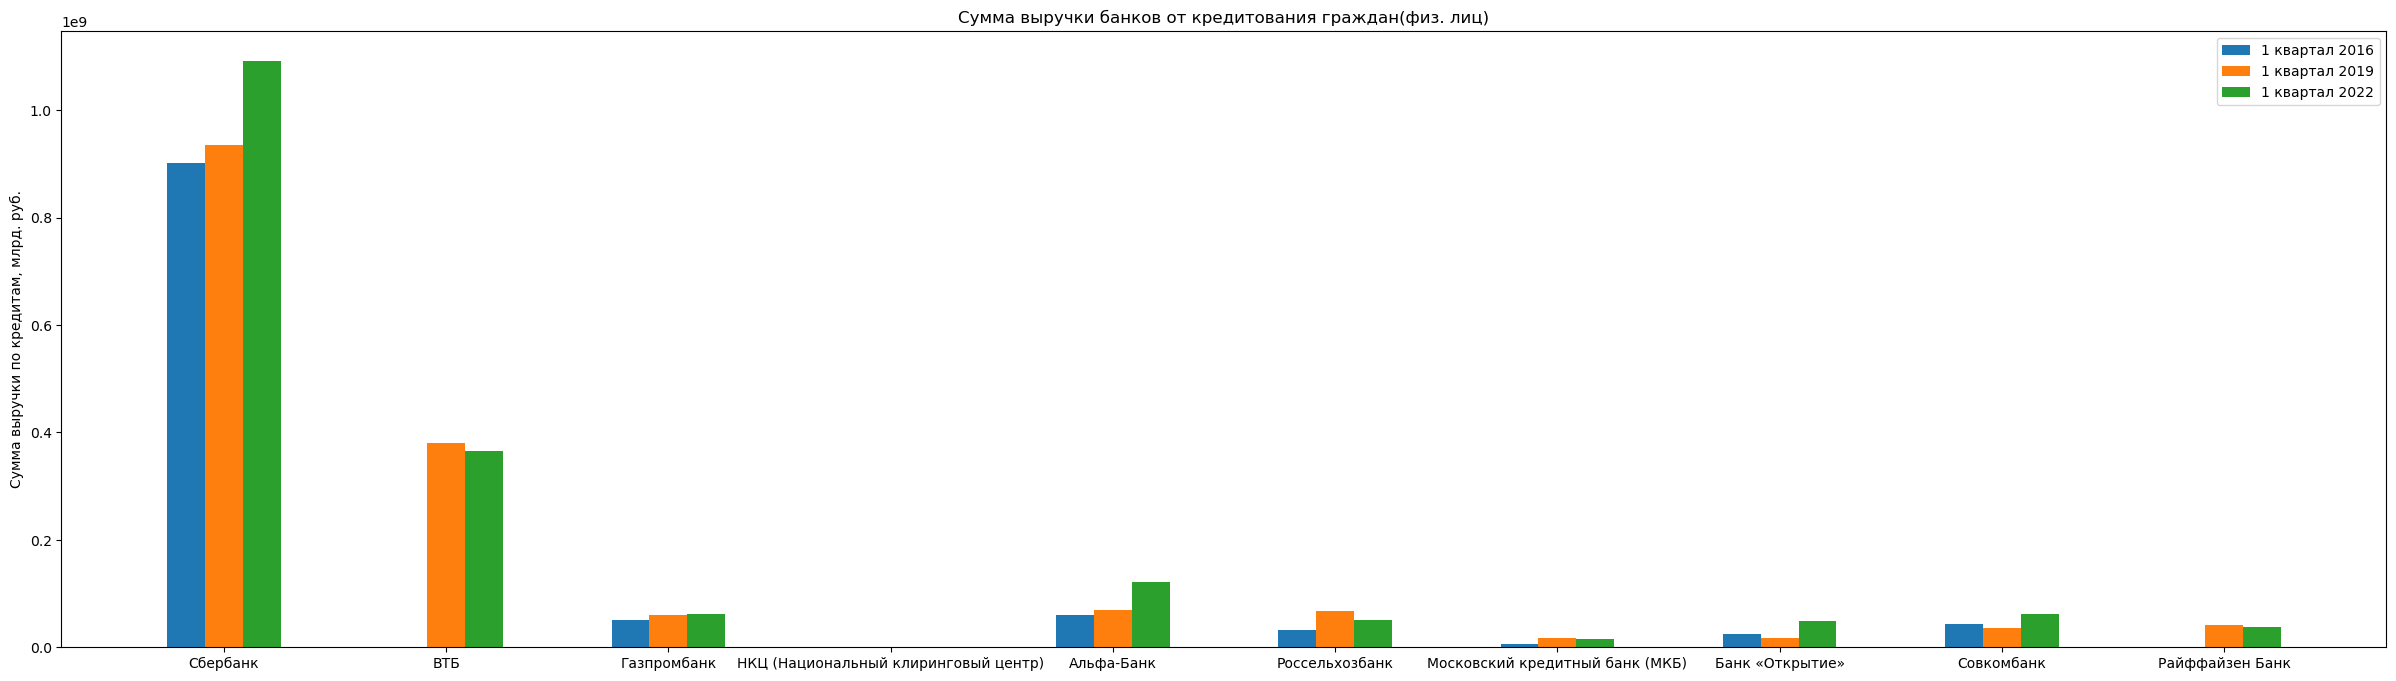

In [11]:
groups = df.sort_values('Место в рейтинге').groupby(['Дата отчёта', 'Символы'])

y2016_data = np.append(np.asarray(groups.get_group(('2016-01-01', 11115))['Всего'].tolist()), 0) * 1.4285 # инфляция 42.85%
y2019_data = np.asarray(groups.get_group(('2019-01-01', 11115))['Всего'].tolist()) * 1.27 # инфляция 27%
y2022_data = groups.get_group(('2022-01-01', 11115))['Всего'].tolist()

x = np.arange(len(df.groupby("Банк")))
barWidth = 0.17

plt.bar(x-barWidth, y2016_data, width=barWidth, label='1 квартал 2016')
plt.bar(groups.get_group(('2019-01-01', 11115))['Банк'].tolist(), y2019_data, width=barWidth, label='1 квартал 2019')
plt.bar(x+barWidth, y2022_data, width=barWidth, label='1 квартал 2022')

plt.ylabel("Сумма выручки по кредитам, млрд. руб.")
plt.title("Сумма выручки банков от кредитования граждан(физ. лиц)")
plt.legend()
plt.savefig("graph.png", bbox_inches='tight')
plt.show()


# Вывод
Согласно полученному графику можно сделать вывод, что пандемия коронавируса повлекла за собой увеличение потребностей населения в кредитах.